In [121]:
#Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.metrics
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import preprocessing
from sklearn.metrics import ConfusionMatrixDisplay,precision_score,recall_score,f1_score,PrecisionRecallDisplay,log_loss
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.neural_network import MLPRegressor, MLPClassifier




#import data and clean
dataHousing = pd.read_csv('housing.csv')
dataLoan = pd.read_csv('loan.csv')

dataHousing.dropna(inplace=True)
dataLoan.dropna(inplace=True)

housing_X = dataHousing.drop("median_house_value", axis=1)
housing_Y = dataHousing.pop("median_house_value")


print(housing_X.head())


loan_X = dataLoan.drop("loan_status",axis=1) #input
loan_Y = dataLoan.pop("loan_status")#output



   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income ocean_proximity  
0       322.0       126.0         8.3252        NEAR BAY  
1      2401.0      1138.0         8.3014        NEAR BAY  
2       496.0       177.0         7.2574        NEAR BAY  
3       558.0       219.0         5.6431        NEAR BAY  
4       565.0       259.0         3.8462        NEAR BAY  


In [112]:
#Encoding textual data into numerical
loan_encoder = preprocessing.OrdinalEncoder()
housing_encoder = preprocessing.OrdinalEncoder()
loan_X=loan_encoder.fit_transform(loan_X)
housing_X=housing_encoder.fit_transform(housing_X)
#PreProcess Housing
scalerX = preprocessing.StandardScaler()
scaledX =scalerX.fit_transform(housing_X)

housing_Y=pd.DataFrame(housing_Y)

scalerY=preprocessing.StandardScaler()
scaledY =scalerY.fit_transform(housing_Y.values.reshape(-1,1))

housing_x=pd.DataFrame(scaledX)





#Split data into train and test sets

Housing_X_Train,Housing_X_Test,Housing_Y_Train,Housing_Y_Test = train_test_split(scaledX,scaledY , test_size=0.2)
Loan_X_Train, Loan_X_Test, Loan_Y_Train, Loan_Y_Test = train_test_split(loan_X, loan_Y, test_size=0.5)

(20433, 9)


In [114]:


#Random Forests


#Create Model Instances
HousingModel = RandomForestRegressor(max_depth = 20, n_estimators = 500)
LoanModel = RandomForestClassifier(max_depth = 20, n_estimators = 500)

#Fit models

HousingModel.fit(Housing_X_Train, Housing_Y_Train)
LoanModel.fit(Loan_X_Train, Loan_Y_Train)

#Predict

HousingRTreePredict= HousingModel.predict(Housing_X_Test)
LoanRTreePredict= LoanModel.predict(Loan_X_Test)

C:\Users\trevo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


R^2 Housing: 0.7481554687449428
MSE Housing: 0.1883114771937447
Accuracy:
[0.92622222 0.92355556 0.92177778 0.92866667 0.92311111]
Recall Score:
0.7587238285144566
Precision Score:
0.8867396877184806
F1 Score:
0.8177519879647539
Cross-Entropy Score:
0.17686090093859025


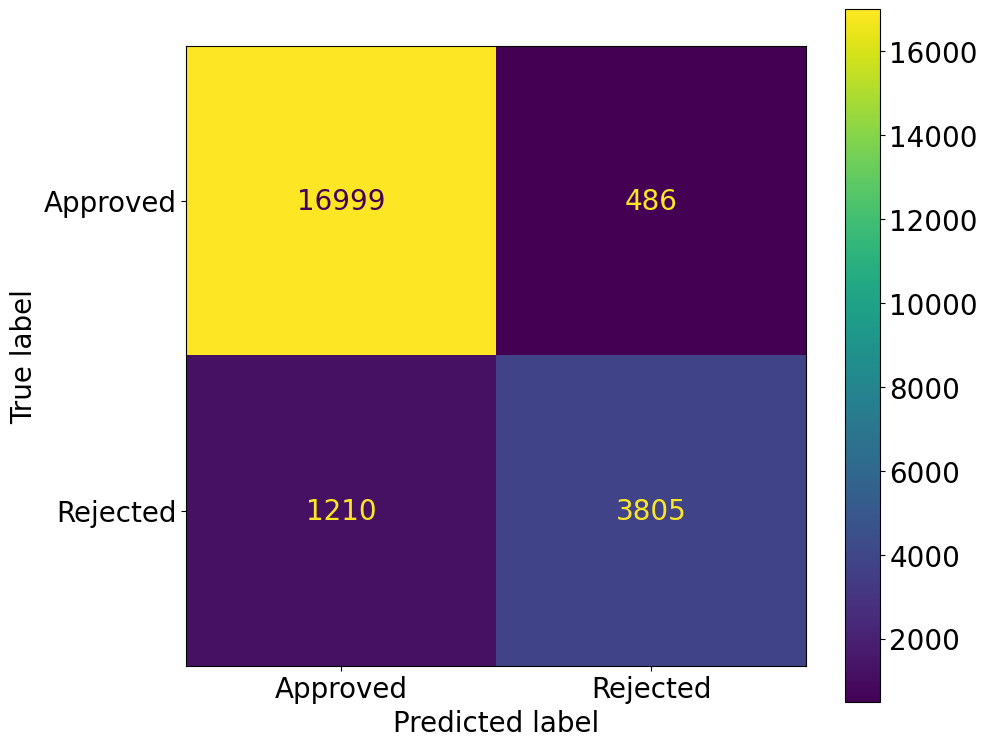

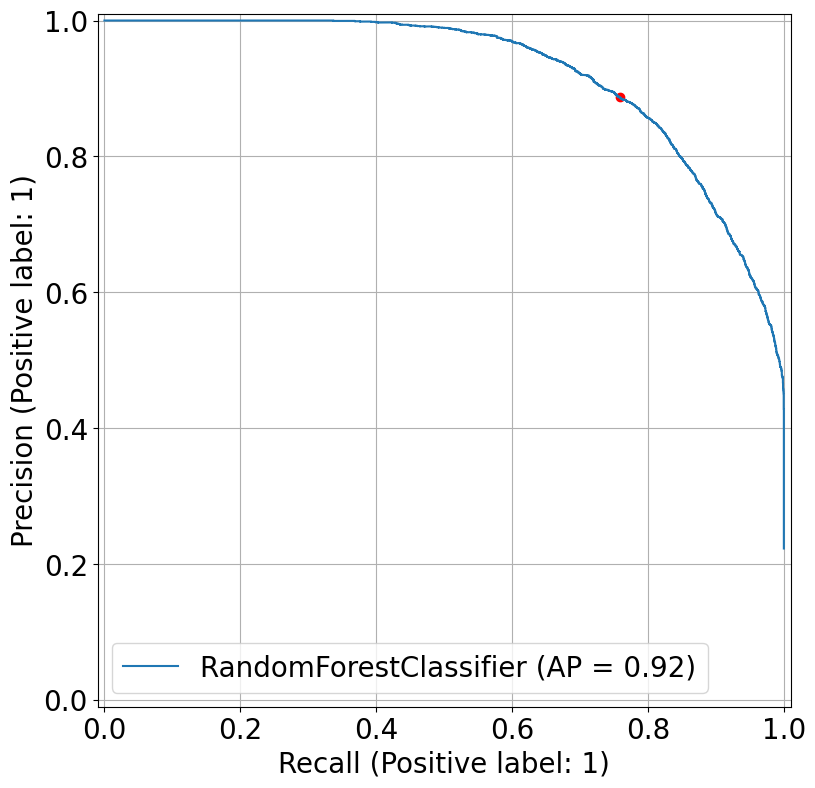

In [122]:


#Scoring

#Regression
print("R^2 Housing:",r2_score(HousingRTreePredict, Housing_Y_Test))
print("MSE Housing:", mean_squared_error(HousingRTreePredict, Housing_Y_Test))


#Classification


ConfusionMatrixDisplay.from_predictions(Loan_Y_Test,LoanRTreePredict, display_labels=['Approved','Rejected'])
print("Accuracy:")
print(cross_val_score(LoanModel, Loan_X_Test,Loan_Y_Test, cv=5, scoring='accuracy'))
print("Recall Score:")
print(recall_score(Loan_Y_Test,LoanRTreePredict))
print("Precision Score:")
print(precision_score(Loan_Y_Test,LoanRTreePredict))
print("F1 Score:")
print(f1_score(Loan_Y_Test,LoanRTreePredict))
print("Cross-Entropy Score:")
Ypred= LoanModel.predict_proba(Loan_X_Test)[:,1]
print(log_loss(Loan_Y_Test,Ypred))
#plot precision and recall
plt.rcParams.update({'font.size': 20,"figure.figsize":(10,9)})

PrecisionRecallDisplay.from_estimator(LoanModel,Loan_X_Test,Loan_Y_Test)
plt.scatter(recall_score(Loan_Y_Test,LoanRTreePredict),precision_score(Loan_Y_Test,LoanRTreePredict),c='r',label='Precision')
plt.grid()
plt.show()


In [116]:


housing_model= MLPRegressor(hidden_layer_sizes=(100,100,100),max_iter=1000, activation= 'relu', solver='adam')
loan_model = MLPClassifier(hidden_layer_sizes=(100,100,100),max_iter=1000, activation= 'relu',solver='adam')
housing_model.fit(scaledX,scaledY)
loan_model.fit(Loan_X_Train,Loan_Y_Train)
housing_pred_MLP = housing_model.predict(scaledX)
loan_pred_MLP = loan_model.predict(Loan_X_Test)






C:\Users\trevo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1650: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R2: 0.920776246114727 
MSE:  0.07922375388527302
Accuracy:
[0.85111111 0.83866667 0.82866667 0.85177778 0.82777778]
Recall Score:
0.5541375872382851
Precision Score:
0.7592896174863388
F1 Score:
0.6406916426512969
Cross-Entropy Score:
0.33021392445717795


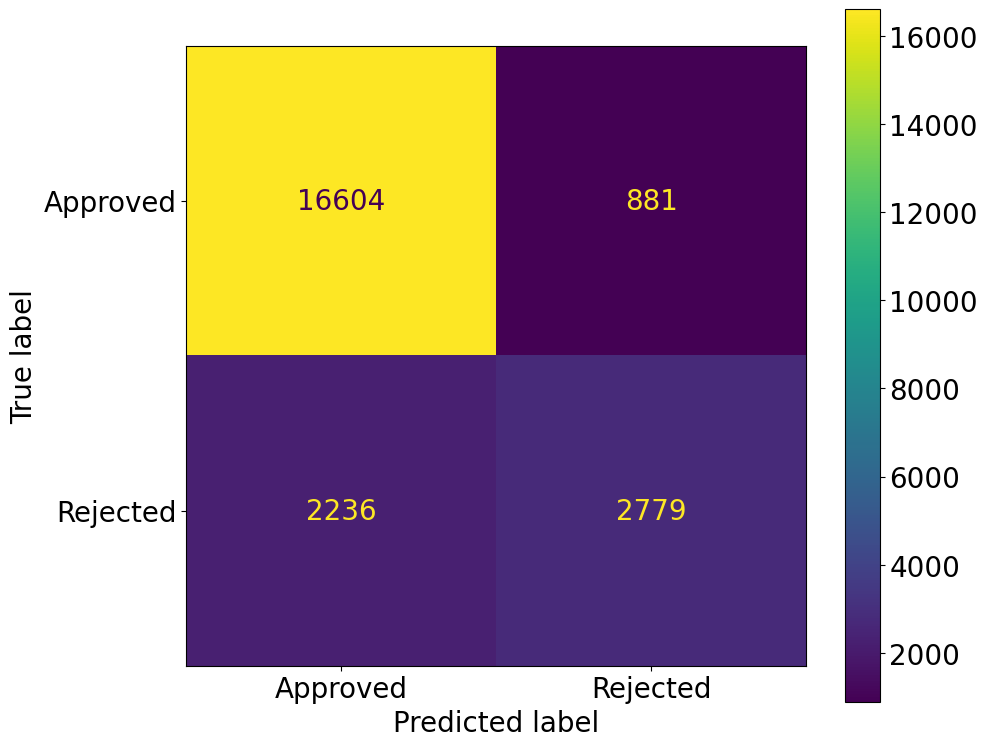

In [123]:
#housing
r2 =r2_score(scaledY, housing_pred_MLP)
MSE = mean_squared_error(scaledY, housing_pred_MLP)
print("R2:",r2,"\nMSE: ",MSE)

#Loan
ConfusionMatrixDisplay.from_predictions(Loan_Y_Test,loan_pred_MLP, display_labels=['Approved','Rejected'])
print("Accuracy:")
print(cross_val_score(loan_model,Loan_X_Test,Loan_Y_Test, cv=5, scoring='accuracy'))
print("Recall Score:")
print(recall_score(Loan_Y_Test,loan_pred_MLP))
print("Precision Score:")
print(precision_score(Loan_Y_Test,loan_pred_MLP))
print("F1 Score:")
print(f1_score(Loan_Y_Test,loan_pred_MLP))
print("Cross-Entropy Score:")
Ypred= loan_model.predict_proba(Loan_X_Test)[:,1]
print(log_loss(Loan_Y_Test,Ypred))

In [124]:
#Neural Network


#Creat an instance of the models


housing_neural_model = Sequential()
loan_neural_model = Sequential()


housing_neural_model.add(Dense(units=32, activation='relu', input_dim=9))


housing_neural_model.add(Dense(activation='relu', units=1))


housing_neural_model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              loss='mean_squared_error')
#____________________________________________________________________________________________________________
loan_neural_model.add(Dense(units=8, activation='relu', input_dim=13))


loan_neural_model.add(Dense(units=1, activation='sigmoid'))


loan_neural_model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
              loss='binary_crossentropy', metrics=['accuracy'])

C:\Users\trevo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [126]:
housing_model_network = housing_neural_model.fit(scaledX,scaledY, epochs=100, batch_size=8)


Epoch 1/100
2555/2555 ━━━━━━━━━━━━━━━━━━━━ 2s 735us/step - loss: 0.5322
Epoch 2/100
2555/2555 ━━━━━━━━━━━━━━━━━━━━ 2s 748us/step - loss: 0.5382
Epoch 3/100
2555/2555 ━━━━━━━━━━━━━━━━━━━━ 2s 745us/step - loss: 0.5320
Epoch 4/100
2555/2555 ━━━━━━━━━━━━━━━━━━━━ 2s 762us/step - loss: 0.5273
Epoch 5/100
2555/2555 ━━━━━━━━━━━━━━━━━━━━ 2s 820us/step - loss: 0.5231
Epoch 6/100
2555/2555 ━━━━━━━━━━━━━━━━━━━━ 2s 796us/step - loss: 0.5198
Epoch 7/100
2555/2555 ━━━━━━━━━━━━━━━━━━━━ 2s 803us/step - loss: 0.5348
Epoch 8/100
2555/2555 ━━━━━━━━━━━━━━━━━━━━ 2s 875us/step - loss: 0.5216
Epoch 9/100
2555/2555 ━━━━━━━━━━━━━━━━━━━━ 2s 772us/step - loss: 0.5220
Epoch 10/100
2555/2555 ━━━━━━━━━━━━━━━━━━━━ 2s 763us/step - loss: 0.5254
Epoch 11/100
2555/2555 ━━━━━━━━━━━━━━━━━━━━ 2s 755us/step - loss: 0.5179
Epoch 12/100
2555/2555 ━━━━━━━━━━━━━━━━━━━━ 2s 760us/step - loss: 0.5161
Epoch 13/100
2555/2555 ━━━━━━━━━━━━━━━━━━━━ 2s 755us/step - loss: 0.5165
Epoch 14/100
2555/2555 ━━━━━━━━━━━━━━━━━━━━ 2s 801us/step - 

In [141]:
loan_model_network = loan_neural_model.fit(Loan_X_Train, Loan_Y_Train, epochs=100, batch_size=8)

Epoch 1/100
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 2s 813us/step - accuracy: 0.7791 - loss: 0.5288
Epoch 2/100
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 2s 827us/step - accuracy: 0.7792 - loss: 0.5285
Epoch 3/100
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 2s 834us/step - accuracy: 0.7784 - loss: 0.5293
Epoch 4/100
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 2s 832us/step - accuracy: 0.7724 - loss: 0.5369
Epoch 5/100
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 2s 835us/step - accuracy: 0.7726 - loss: 0.5360
Epoch 6/100
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 2s 872us/step - accuracy: 0.7747 - loss: 0.5340
Epoch 7/100
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 2s 836us/step - accuracy: 0.7823 - loss: 0.5245
Epoch 8/100
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 2s 859us/step - accuracy: 0.7715 - loss: 0.5379
Epoch 9/100
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 2s 835us/step - accuracy: 0.7744 - loss: 0.5345
Epoch 10/100
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 2s 855us/step - accuracy: 0.7799 - loss: 0.5277
Epoch 11/100
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 3s 882us/step - accuracy: 0.7776 - loss: 0.53

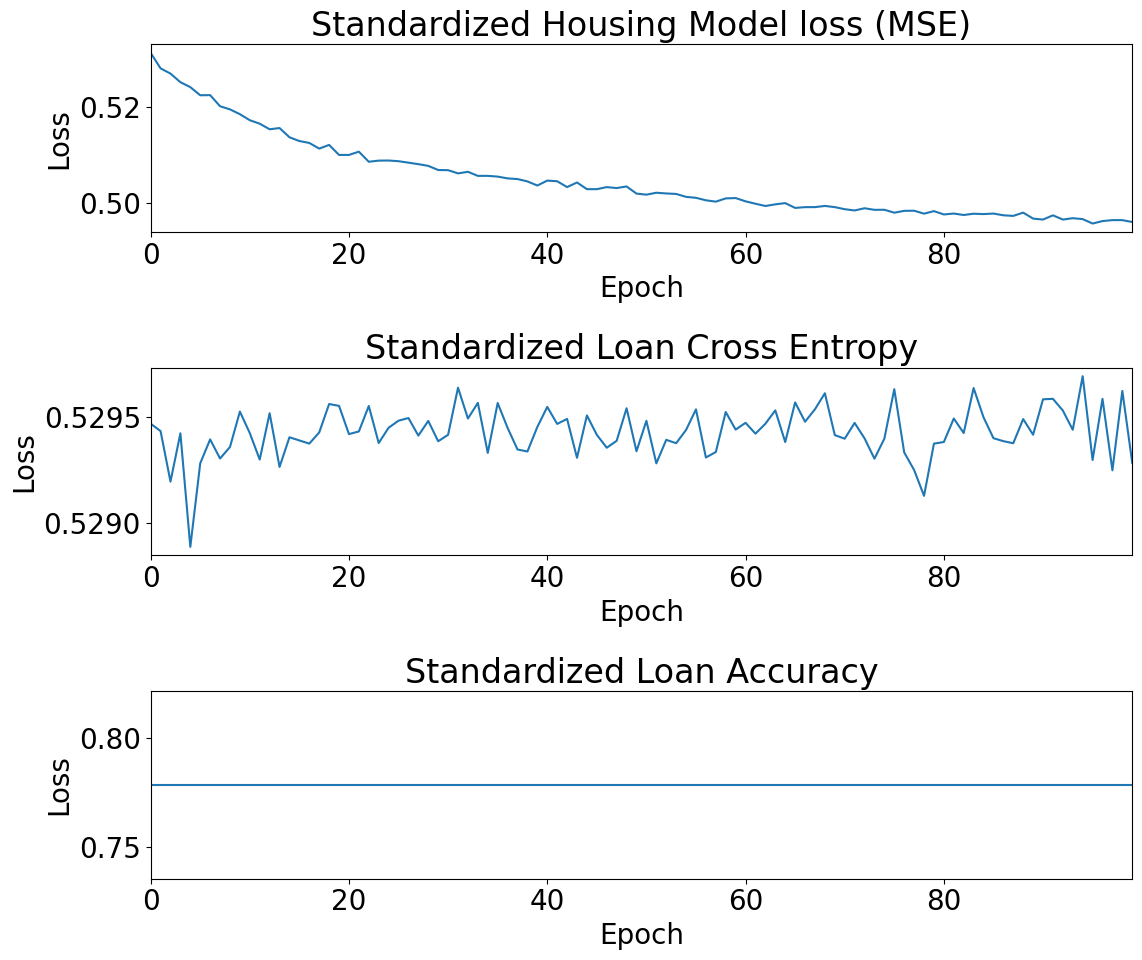

In [142]:
plt.rcParams["figure.figsize"] = (12,10)

fig, axs = plt.subplots(3)

axs[0].plot(housing_model_network.history['loss'])
axs[0].set_title('Standardized Housing Model loss (MSE)')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].set_xlim([0, 99])


axs[1].plot(loan_model_network.history['loss'])
axs[1].set_title('Standardized Loan Cross Entropy')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].set_xlim([0, 99])

axs[2].plot(loan_model_network.history['accuracy'])
axs[2].set_title('Standardized Loan Accuracy')
axs[2].set_xlabel('Epoch')
axs[2].set_ylabel('Loss')
axs[2].set_xlim([0, 99])


plt.tight_layout()

plt.show()

In [145]:
nnhousingpredict =   housing_neural_model.predict(scaledX)
nnloanPredict = loan_neural_model.predict(Loan_X_Test)





print(r2_score(scaledY,nnhousingpredict))


639/639 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step
704/704 ━━━━━━━━━━━━━━━━━━━━ 0s 532us/step
0.5071786977750987
